In [71]:
import pandas as pd;
import numpy as np;
import tensorflow as tf;
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # 텐서플로를 사용하면서 에러를 잡아주기 위한...
from tensorflow.python.keras.utils.np_utils import to_categorical
import pickle


# 데이터 로드

In [72]:
from tensorflow.keras.datasets.mnist import load_data;
(x_train, y_train),(x_test, y_test) = load_data(path='mnist.npz');

# 데이터 확인

In [73]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [74]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [75]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [76]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

# 이미지 보기

In [77]:
# Show image
import matplotlib.pyplot as plt;
img = x_train[0, :];
img

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

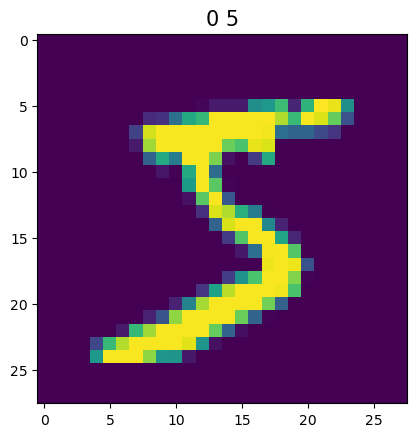

In [78]:
label = y_train[0];
plt.figure();
plt.imshow(img);
plt.title('%d %d' % (0, label), fontsize=15);
plt.show();

# 훈련 데이터 검증 데이터 분리

In [79]:
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import MinMaxScaler;

x_train, x_vali, y_train, y_vali = train_test_split(x_train, y_train,
                                                    test_size=0.3,
                                                    random_state=777
                                                    );
print(x_train.shape, y_train.shape)
print(x_vali.shape, y_vali.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


# x_train 차원 축소

In [80]:
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
print('x_train차원 축소 :', x_train.shape)
x_vali = x_vali.reshape(x_vali.shape[0], 28 * 28)
print('x_vali차원 축소 :', x_vali.shape)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)
print('x_test차원 축소 :', x_test.shape)


x_train차원 축소 : (42000, 784)
x_vali차원 축소 : (18000, 784)
x_test차원 축소 : (10000, 784)


# x_train 정규화

In [81]:
# 정규화!! (min max scaler는 3차원을 가능하지 않음.)
x_train_scaler = MinMaxScaler().fit_transform(x_train)
x_vali_scaler = MinMaxScaler().fit_transform(x_vali)
x_test_scaler = MinMaxScaler().fit_transform(x_test)

print('정규화된 형태',x_train_scaler[0, :])


정규화된 형태 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.09803922 0.49411765 0.81568627 0.9

# y_train 범주형 변환

In [82]:
# 데이터가 시리얼 형태로 들어가 있음.
# 데이터를 범주형으로 변환
print(y_train.shape)
print('원본 데이터:',y_train[1])
y_train_cate = to_categorical(y_train) # 원핫인코딩과 유사한 개념
print(y_train.shape)
print('to_categorical 이후:',y_train[1])
y_vali_cate = to_categorical(y_vali)
y_test_cate = to_categorical(y_test)

(42000,)
원본 데이터: 7
(42000,)
to_categorical 이후: 7


# 모델 구성 - 신경망 구성

In [83]:
# 모델 구성 - 신경망 구성
from tensorflow.keras.models import Sequential;
from tensorflow.keras.layers import Dense;

model = Sequential();
# 784개 들어와서 10개가 나감.
model.add(Dense(64, activation='relu', input_shape=(784, )))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # 다중분류라서...softmax

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']);
model.fit(x_train_scaler, y_train_cate,
          epochs=30,
          validation_data=(x_vali_scaler, y_vali_cate),
          verbose=1);


Epoch 1/30
1313/1313 [==============================] - 1s 848us/step - loss: 0.3497 - acc: 0.9000 - val_loss: 0.1839 - val_acc: 0.9481
Epoch 2/30
1313/1313 [==============================] - 1s 717us/step - loss: 0.1510 - acc: 0.9545 - val_loss: 0.1441 - val_acc: 0.9588
Epoch 3/30
1313/1313 [==============================] - 1s 686us/step - loss: 0.1115 - acc: 0.9669 - val_loss: 0.1215 - val_acc: 0.9652
Epoch 4/30
1313/1313 [==============================] - 1s 755us/step - loss: 0.0863 - acc: 0.9733 - val_loss: 0.1269 - val_acc: 0.9623
Epoch 5/30
1313/1313 [==============================] - 1s 697us/step - loss: 0.0700 - acc: 0.9776 - val_loss: 0.1111 - val_acc: 0.9668
Epoch 6/30
1313/1313 [==============================] - 1s 678us/step - loss: 0.0576 - acc: 0.9820 - val_loss: 0.1234 - val_acc: 0.9642
Epoch 7/30
1313/1313 [==============================] - 1s 703us/step - loss: 0.0493 - acc: 0.9842 - val_loss: 0.1110 - val_acc: 0.9672
Epoch 8/30
1313/1313 [==========================

# 모델 검증

In [84]:
print(model.evaluate(x_test_scaler, y_test_cate))

313/313 [==============================] - 0s 419us/step - loss: 0.1758 - acc: 0.9726
[0.17576326429843903, 0.972599983215332]


# 모델 조정

In [85]:
model = Sequential();
# 784개 들어와서 10개가 나감.
model.add(Dense(128, activation='relu', input_shape=(784, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # 다중분류라서...softmax

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']);
model.fit(x_train_scaler, y_train_cate,
          epochs=30,
          validation_data=(x_vali_scaler, y_vali_cate),
          verbose=1);
model.evaluate(x_test_scaler, y_test_cate)

Epoch 1/30
1313/1313 [==============================] - 1s 990us/step - loss: 0.3026 - acc: 0.9106 - val_loss: 0.1574 - val_acc: 0.9534
Epoch 2/30
1313/1313 [==============================] - 1s 900us/step - loss: 0.1264 - acc: 0.9620 - val_loss: 0.1271 - val_acc: 0.9619
Epoch 3/30
1313/1313 [==============================] - 1s 825us/step - loss: 0.0871 - acc: 0.9724 - val_loss: 0.1151 - val_acc: 0.9659
Epoch 4/30
1313/1313 [==============================] - 1s 893us/step - loss: 0.0654 - acc: 0.9786 - val_loss: 0.1124 - val_acc: 0.9689
Epoch 5/30
1313/1313 [==============================] - 1s 875us/step - loss: 0.0532 - acc: 0.9830 - val_loss: 0.0993 - val_acc: 0.9714
Epoch 6/30
1313/1313 [==============================] - 1s 861us/step - loss: 0.0428 - acc: 0.9864 - val_loss: 0.0950 - val_acc: 0.9736
Epoch 7/30
1313/1313 [==============================] - 1s 840us/step - loss: 0.0356 - acc: 0.9880 - val_loss: 0.0943 - val_acc: 0.9739
Epoch 8/30
1313/1313 [==========================

[0.135667085647583, 0.9789000153541565]

# 예측값 확인

In [86]:
result = model.predict(x_test_scaler);
print(result.shape)
print(result[0])

(10000, 10)
[2.7663086e-14 8.5450726e-12 4.5523741e-13 6.0211929e-09 5.1791944e-15
 7.6742378e-14 3.0203820e-18 1.0000000e+00 8.5978825e-15 7.6635320e-10]


In [87]:
# with open("mnist.model", "wb") as w:
#     pickle.dump(model, w);

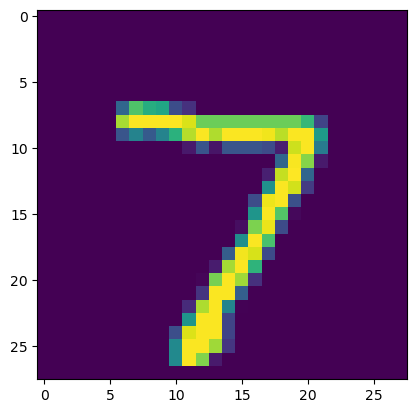

In [88]:
plt.imshow(x_test[0].reshape(28,28))
plt.show()

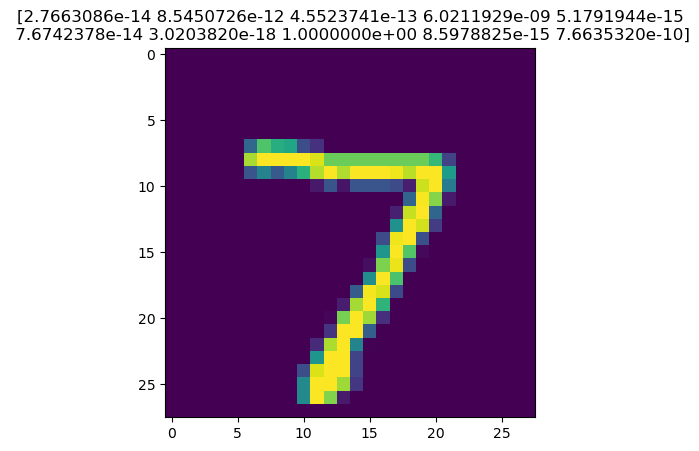

In [89]:
plt.imshow(x_test[0].reshape(28,28))
plt.title(str(result[0]))
plt.show()

# 배치사이즈 조정

In [90]:
model = Sequential();
# 784개 들어와서 10개가 나감.
model.add(Dense(128, activation='relu', input_shape=(784, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax')) # 다중분류라서...softmax

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']);
model.fit(x_train_scaler, y_train_cate,
          epochs=30,
          batch_size=128, # 데이터를 128개씩 나누어 메모리에 올리고 처리
          validation_data=(x_vali_scaler, y_vali_cate),
          verbose=1);
model.evaluate(x_test_scaler, y_test_cate)

Epoch 1/30
329/329 [==============================] - 1s 2ms/step - loss: 0.4311 - acc: 0.8710 - val_loss: 0.1948 - val_acc: 0.9444
Epoch 2/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1599 - acc: 0.9535 - val_loss: 0.1531 - val_acc: 0.9546
Epoch 3/30
329/329 [==============================] - 1s 2ms/step - loss: 0.1138 - acc: 0.9666 - val_loss: 0.1128 - val_acc: 0.9668
Epoch 4/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0847 - acc: 0.9743 - val_loss: 0.1036 - val_acc: 0.9702
Epoch 5/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0664 - acc: 0.9799 - val_loss: 0.1057 - val_acc: 0.9684
Epoch 6/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0519 - acc: 0.9841 - val_loss: 0.0940 - val_acc: 0.9717
Epoch 7/30
329/329 [==============================] - 1s 2ms/step - loss: 0.0411 - acc: 0.9869 - val_loss: 0.0945 - val_acc: 0.9714
Epoch 8/30
329/329 [==============================] - 1s 2ms/step - loss: 0.

[0.12552037835121155, 0.977400004863739]